# Multidimensional differential equations

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

# 3-body problem

In [4]:
# Constants in SI units

# Gravitational constant
G = 6.67430*10**(-11) # m^3 / ( kg * s^2 )

# Masses
msun = 1.9884 * 10**30 # kg
mearth = 5.9723 * 10**24 # kg
mmoon = 7.349 * 10**22 # kg

# Distances (average)
rSunEarth = 1.4960 * 10**11 # m
rEarthMoon = 3.850 * 10**8 # m

# Velocities (average)
vEarth = 29780 # m/s (Trajectory around sun)
vMoon = 1022 # m/s (Trajectory around earth)

## A) Sun, Earth & Moon

Variables for each of the 3 bodies: $x, y, z, v_x, v_y, v_z$

Force: Newton's law of gravitation 

$ \vec{F} =G\frac{m_1m_2}{|\vec{r}_0-\vec{r}|^3}(\vec{r}_0-\vec{r}) = -G\frac{m_1m_2}{r^2}\vec{e}_r$ for $ \vec{r}_0=0$

For the three bodies

$$ m_1\ddot{\vec{r}_1}=
G\frac{m_1m_2}{|\vec{r}_2-\vec{r}_1|^3}(\vec{r}_2-\vec{r}_1) + G\frac{m_1m_3}{|\vec{r}_3-\vec{r}_1|^3}(\vec{r}_3-\vec{r}_1)\\
m_2\ddot{\vec{r}_2}=
G\frac{m_2m_1}{|\vec{r}_1-\vec{r}_2|^3}(\vec{r}_1-\vec{r}_2) + G\frac{m_2m_3}{|\vec{r}_3-\vec{r}_2|^3}(\vec{r}_3-\vec{r}_2)\\
m_3\ddot{\vec{r}_3}=
G\frac{m_3m_1}{|\vec{r}_1-\vec{r}_3|^3}(\vec{r}_1-\vec{r}_3) + G\frac{m_3m_2}{|\vec{r}_2-\vec{r}_3|^3}(\vec{r}_2-\vec{r}_3)
$$

We have the solve the following differential equations

$$ \ddot{\vec{r}_1}=
-G\left(\frac{m_2}{|\vec{r}_2-\vec{r}_1|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_1|^3}\right)\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_1|^3}\vec{r}_2 + G\frac{m_3}{|\vec{r}_3-\vec{r}_1|^3}\vec{r}_3\\
\ddot{\vec{r}_2}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_2|^3}\vec{r}_1 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_2|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_2|^3}\right)\vec{r}_2 + G\frac{m_3}{|\vec{r}_3-\vec{r}_2|^3}\vec{r}_3\\
\ddot{\vec{r}_3}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_3|^3}\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_3|^3}\vec{r}_2 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_3|^3}+\frac{m_2}{|\vec{r}_2-\vec{r}_3|^3}\right)\vec{r}_3
$$

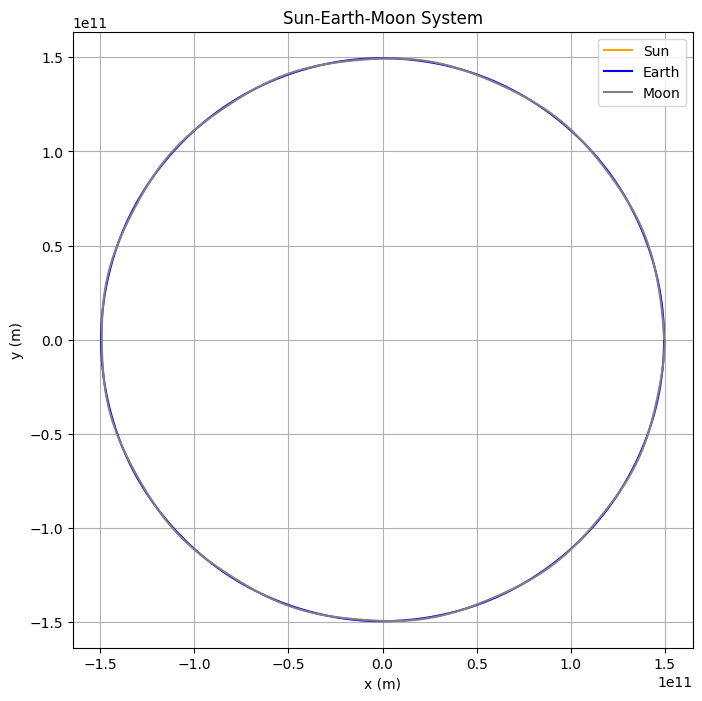

In [28]:
def f_ODE(t, r, masses):
    """
    Solves the ODEs for the Sun-Earth-Moon system.

    Args:
        t (float): Time
        r (np.ndarray): Array of positions and velocities
        masses (list): Masses of the Sun, Earth, and Moon [m1, m2, m3]

    Returns:
        np.ndarray: Derivatives of position and velocity
    """
    # Extract position and velocity vectors
    r1, r2, r3 = r[0:3], r[3:6], r[6:9]  # Positions
    v1, v2, v3 = r[9:12], r[12:15], r[15:18]  # Velocities
    
    # Compute distances
    r12 = np.linalg.norm(r1 - r2)
    r23 = np.linalg.norm(r3 - r2)
    r31 = np.linalg.norm(r1 - r3)
    
    # Masses
    m1, m2, m3 = masses
    
    # Compute accelerations
    a1 = G * (
        -(m2 / r12**3) * (r1 - r2) 
        -(m3 / r31**3) * (r1 - r3)
    )
    a2 = G * (
        -(m1 / r12**3) * (r2 - r1) 
        -(m3 / r23**3) * (r2 - r3)
    )
    a3 = G * (
        -(m1 / r31**3) * (r3 - r1) 
        -(m2 / r23**3) * (r3 - r2)
    )
    
    # Concatenate derivatives: [velocities, accelerations]
    drdt = np.concatenate([v1, v2, v3, a1, a2, a3])
    return drdt

# Initial positions and velocities
r1start = np.array([0, 0, 0])  # Sun
v1start = np.array([0, 0, 0])
r2start = np.array([rSunEarth, 0, 0])  # Earth
v2start = np.array([0, vEarth, 0])
r3start = np.array([rSunEarth, rEarthMoon, 0])  # Moon
v3start = np.array([-vMoon, vEarth, 0])

# Combine into a single array for initial state
r0 = np.concatenate([r1start, r2start, r3start, v1start, v2start, v3start])
masses = [msun, mearth, mmoon]

# Time span for integration
t_span = (0, 3.154e7)  # 10 year in seconds
t_eval = np.linspace(0, 3.154e7, 1000)

# Solve the ODEs
solution = integrate.solve_ivp(f_ODE, t_span, r0, args=(masses,), method='RK45', t_eval=t_eval, rtol= 0.001*1e-3, atol= 0.001*1e-6)

# Extract positions for plotting
r1_sol = solution.y[0:3, :]
r2_sol = solution.y[3:6, :]
r3_sol = solution.y[6:9, :]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(r1_sol[0], r1_sol[1], label='Sun', color='orange')
plt.plot(r2_sol[0], r2_sol[1], label='Earth', color='blue')
plt.plot(r3_sol[0], r3_sol[1], label='Moon', color='gray')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Sun-Earth-Moon System')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


### Sun

Text(0, 0.5, 'y')

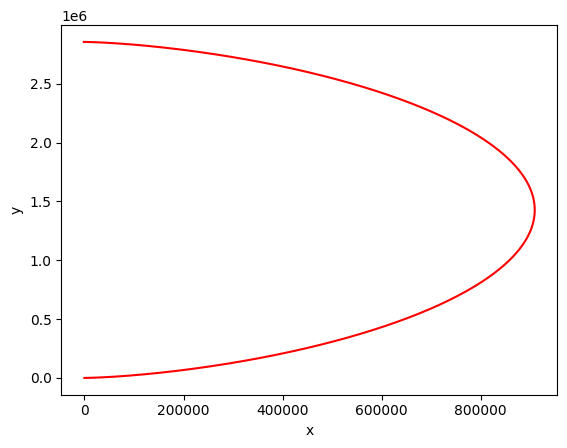

In [30]:
plt.plot(r1_sol[0], r1_sol[1], 'red')
plt.xlabel('x')            ### in one year
plt.ylabel('y')

### Earth

Text(0, 0.5, 'y')

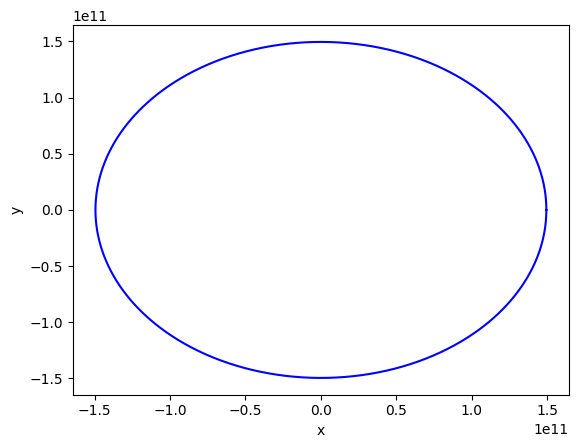

In [31]:
plt.plot(r2_sol[0], r2_sol[1], 'blue')
plt.xlabel('x')            ### in one year
plt.ylabel('y')

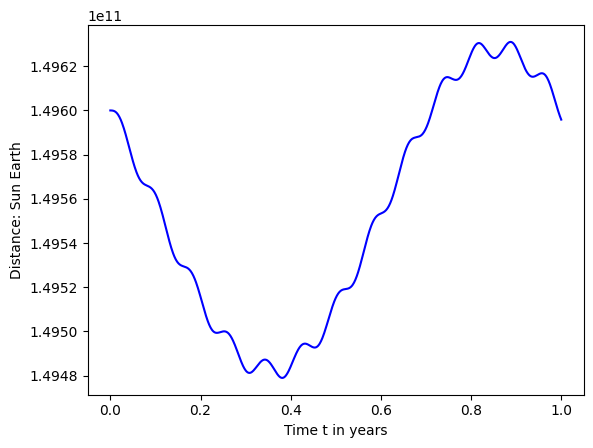

In [35]:
plt.xlabel("Time t in years")
plt.ylabel("Distance: Sun Earth")
plt.plot(solution.t / (60*60*24*365.25), np.linalg.norm(r1_sol - r2_sol, axis= 0), 'blue')

### Moon

Text(0, 0.5, 'y')

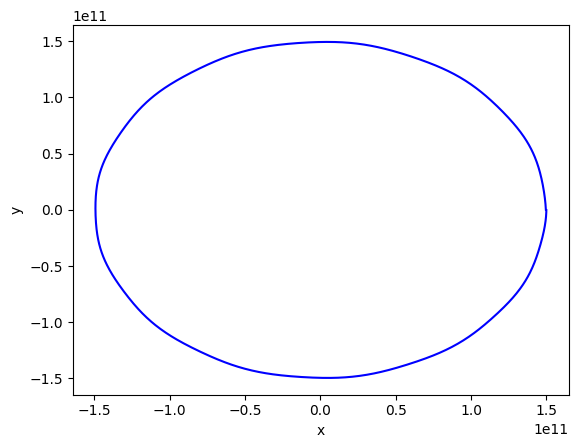

In [32]:
plt.plot(r3_sol[0], r3_sol[1], 'blue')
plt.xlabel('x')            ### in one year
plt.ylabel('y')

### Moon orbit around earth

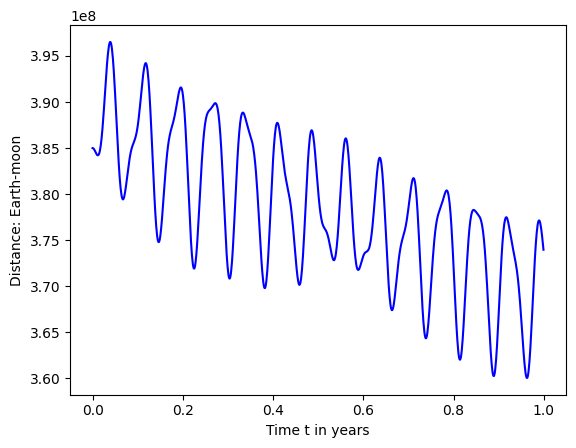

In [36]:
plt.xlabel("Time t in years")
plt.ylabel("Distance: Earth-moon")
plt.plot(solution.t / (60*60*24*365.25), np.linalg.norm(r2_sol - r3_sol, axis= 0), 'blue')

### Exaggerate moon orbit radius

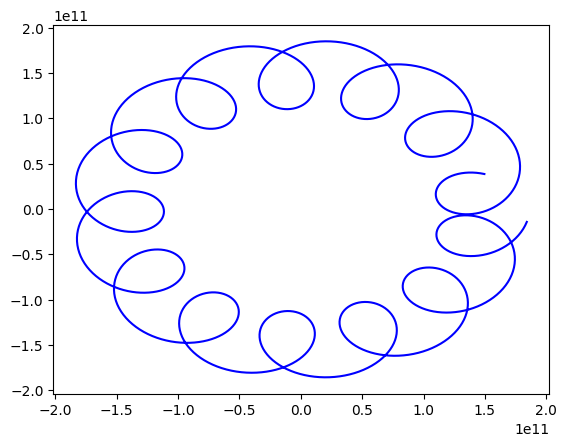

In [38]:
plt.plot(r1_sol[0], r1_sol[1], label='Sun', color='orange')
plt.plot(r2_sol[0] + 100*(r3_sol[0] - r2_sol[0]), r2_sol[1] + 100*(r3_sol[1] - r2_sol[1]), label='Earth', color='blue')


## B) Add a fourth body: Spaceship

Since the mass of the spaceship is so small compared to the other masses, we will disregard the effect on sun, earth and moon. 
The 3 differential equation remain. 

The following equation describes the spaceship

$$
m_4\ddot{\vec{r}_4}=
G\frac{m_4m_1}{|\vec{r}_1-\vec{r}_4|^3}(\vec{r}_1-\vec{r}_4) + 
G\frac{m_4m_2}{|\vec{r}_2-\vec{r}_4|^3}(\vec{r}_2-\vec{r}_4) + 
G\frac{m_4m_3}{|\vec{r}_3-\vec{r}_4|^3}(\vec{r}_3-\vec{r}_4)
$$

We add to our systems of differential equations:

$$
\ddot{\vec{r}_4}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}\vec{r}_2+ G\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\vec{r}_3 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}+\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\right)\vec{r}_4
$$

In [ ]:
def f_ODE_modified(t, r, masses):
    """
    Solves the ODEs for the Sun-Earth-Moon-Spaceship system.

    Args:
        t (float): Time
        r (np.ndarray): Array of positions and velocities (shape: 24)
        masses (list): Masses of the Sun, Earth, Moon, and spaceship [m1, m2, m3, m4]

    Returns:
        np.ndarray: Derivatives of position and velocity
    """
    # Extract position and velocity vectors
    r1, r2, r3, r4 = r[0:3], r[3:6], r[6:9], r[9:12]   # Positions
    v1, v2, v3, v4 = r[12:15], r[15:18], r[18:21], r[21:24]  # Velocities

    # Compute distances
    r12 = np.linalg.norm(r1 - r2)
    r23 = np.linalg.norm(r3 - r2)
    r34 = np.linalg.norm(r4 - r3)
    r41 = np.linalg.norm(r4 - r1)
    r31 = np.linalg.norm(r3 - r1)
    r24 = np.linalg.norm(r2 - r4)

    # Masses
    m1, m2, m3, m4 = masses

    # Compute accelerations
    a1 = G * (
        -(m2 / r12**3) * (r1 - r2)
        -(m3 / r31**3) * (r1 - r3)
    )
    a2 = G * (
        -(m1 / r12**3) * (r2 - r1)
        -(m3 / r23**3) * (r2 - r3)
    )
    a3 = G * (
        -(m1 / r31**3) * (r3 - r1)
        -(m2 / r23**3) * (r3 - r2)
    )
    a4 = G * (
        (m1 / r41**3) * (r1 - r4)
        + (m2 / r24**3) * (r2 - r4)
        + (m3 / r34**3) * (r3 - r4)
    )

    # Concatenate derivatives: [velocities, accelerations]
    drdt = np.concatenate([v1, v2, v3, v4, a1, a2, a3, a4])
    return drdt


# Solve the ODEs
solution = integrate.solve_ivp(
    f_ODE_modified,
    t_span,
    r0,
    args=(masses,),
    method='RK45',
    t_eval=t_eval,
    rtol=1e-6,
    atol=1e-9,
)


C:\Users\disha\AppData\Local\Temp\ipykernel_14620\3217150079.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  + (m3 / r34**3) * (r3 - r4)
C:\Users\disha\AppData\Local\Temp\ipykernel_14620\3217150079.py:44: RuntimeWarning: invalid value encountered in multiply
  + (m3 / r34**3) * (r3 - r4)
